In [88]:
import pandas as pd
occupancy = pd.read_csv('./data/occupancy.csv')
occupancy.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2/2/2015 14:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2/2/2015 15:00,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2/2/2015 16:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2/2/2015 17:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2/2/2015 18:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [89]:
occupancy["datetime"] = pd.to_datetime(occupancy['date'])
occupancy = occupancy.set_index('datetime')
occupancy.drop(columns=["date"], inplace=True)

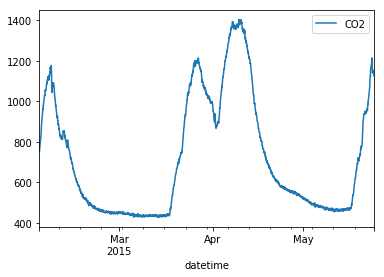

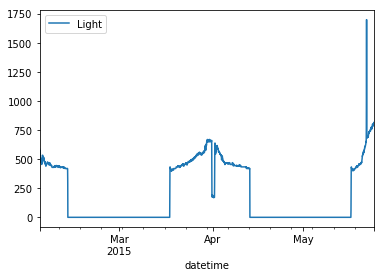

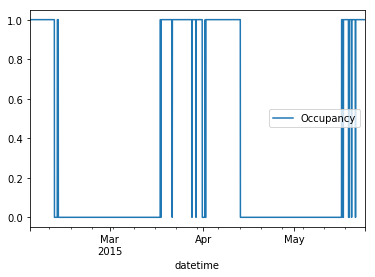

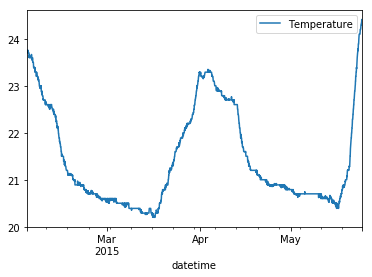

In [90]:
%matplotlib inline
import matplotlib.pyplot as plt
occupancy[["CO2"]].plot()
occupancy[["Light"]].plot()
occupancy[["Occupancy"]].plot()
occupancy[["Temperature"]].plot()

(360,)

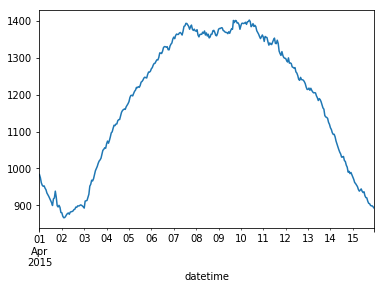

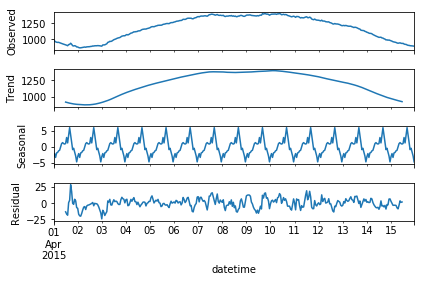

In [91]:
import statsmodels.api as sm


selected_days = occupancy.CO2.loc['2015-4-1':'2015-4-15']
selected_days.plot()
display(selected_days.shape)

res = sm.tsa.seasonal_decompose(selected_days)
resplot = res.plot()

datetime
2015-04-01 01:00:00    974.600000
2015-04-01 02:00:00    961.000000
2015-04-01 03:00:00    954.250000
2015-04-01 04:00:00    951.500000
2015-04-01 05:00:00    952.500000
2015-04-01 06:00:00    946.333333
2015-04-01 07:00:00    942.000000
2015-04-01 08:00:00    933.200000
2015-04-01 09:00:00    928.800000
Name: CO2, dtype: float64

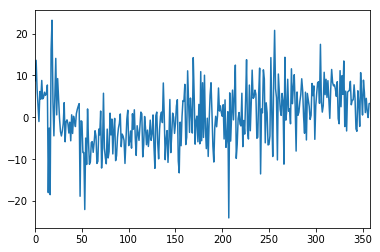

In [92]:
V = selected_days.copy()

dV = V[:-1].reset_index(drop=True) - V[1:].reset_index(drop=True)
dV.plot()
display(V[1:10])

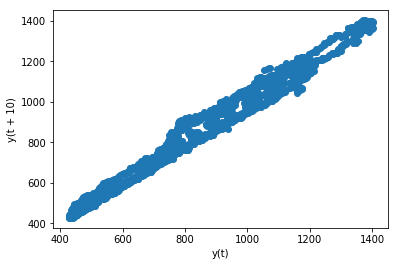

In [93]:
from pandas.plotting import lag_plot
lag_plot(occupancy.CO2, lag=10)


In [94]:

train, test = occupancy.CO2[:-10], occupancy.CO2[-10:]

display(train)
display(test)

datetime
2015-02-02 14:00:00     749.200000
2015-02-02 15:00:00     760.400000
2015-02-02 16:00:00     769.666667
2015-02-02 17:00:00     774.750000
2015-02-02 18:00:00     779.000000
2015-02-02 19:00:00     790.000000
2015-02-02 20:00:00     798.000000
2015-02-02 21:00:00     797.000000
2015-02-02 22:00:00     803.200000
2015-02-02 23:00:00     809.000000
2015-02-03 00:00:00     815.250000
2015-02-03 01:00:00     824.000000
2015-02-03 02:00:00     832.000000
2015-02-03 03:00:00     845.333333
2015-02-03 04:00:00     852.400000
2015-02-03 05:00:00     861.000000
2015-02-03 06:00:00     880.000000
2015-02-03 07:00:00     891.000000
2015-02-03 08:00:00     897.600000
2015-02-03 09:00:00     900.500000
2015-02-03 10:00:00     908.800000
2015-02-03 11:00:00     918.000000
2015-02-03 12:00:00     925.200000
2015-02-03 13:00:00     929.400000
2015-02-03 14:00:00     936.400000
2015-02-03 15:00:00     950.000000
2015-02-03 16:00:00     961.000000
2015-02-03 17:00:00     963.000000
2015-02-03 

datetime
2015-05-24 04:00:00    1153.250000
2015-05-24 05:00:00    1152.400000
2015-05-24 06:00:00    1146.166667
2015-05-24 07:00:00    1145.400000
2015-05-24 08:00:00    1140.800000
2015-05-24 09:00:00    1150.250000
2015-05-24 10:00:00    1129.200000
2015-05-24 11:00:00    1125.800000
2015-05-24 12:00:00    1123.000000
2015-05-24 13:00:00    1124.000000
Name: CO2, dtype: float64

In [95]:
from statsmodels.tsa.ar_model import AR
model = AR(train)
model_fit = model.fit(maxlag=100)

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


In [96]:
pred = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

pd.DataFrame({
    'real': test,
    'prediction':pred,
    'diff': pred-test
})

error = (pred-test).abs().sum() / len(pred)

display(f"Este modelo tiene una cota de error de {error}")



'Este modelo tiene una cota de error de 16.415814143618423'

In [108]:
pred = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)



error = (pred-test).abs().sum() / len(pred)

display(f"Este modelo tiene una cota de error de {error}")

pd.DataFrame({
    'real': test,
    'prediction':pred,
    'diff': pred-test
})

'Este modelo tiene una cota de error de 7.489846699849136'

,real,prediction,diff
2015-05-24 04:00:00,1153.250000,1150.611907,-2.638093
2015-05-24 05:00:00,1152.400000,1148.201610,-4.198390
2015-05-24 06:00:00,1146.166667,1146.436868,0.270201
2015-05-24 07:00:00,1145.400000,1146.054360,0.654360
2015-05-24 08:00:00,1140.800000,1144.681211,3.881211
2015-05-24 09:00:00,1150.250000,1142.072615,-8.177385
2015-05-24 10:00:00,1129.200000,1141.796202,12.596202
2015-05-24 11:00:00,1125.800000,1141.243468,15.443468
2015-05-24 12:00:00,1123.000000,1138.485113,15.485113
2015-05-24 13:00:00,1124.000000,1135.554044,11.554044


In [98]:

for coefs in range(1,100,10):
    model = AR(train)
    model_fit = model.fit(maxlag=coefs)
    pred = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
    error = (pred-test).abs().sum() / len(pred)
    display(f"Coefs={coefs} error={error}")



/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


'Coefs=1 error=15.016314895082996'

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


'Coefs=11 error=7.6230579178288504'

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


'Coefs=21 error=9.742344952718872'

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


'Coefs=31 error=15.0876610373929'

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


'Coefs=41 error=15.348752082200757'

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


'Coefs=51 error=15.45762207008163'

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


'Coefs=61 error=13.623297354358352'

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


'Coefs=71 error=12.728207417357634'

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


'Coefs=81 error=11.968473297097102'

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


'Coefs=91 error=13.542909149835646'

In [109]:
from statsmodels.tsa.arima_model import ARMA

# fit model
model = ARMA(train, order=(20, 2))
model_fit = model.fit(disp=False)
# make prediction
pred= model_fit.predict(len(train), len(train)+len(test)-1)


predi = pd.DataFrame({
    'real': test,
    'prediction':pred,
    'diff': pred-test
})
display(predi)

error = (pred-test).abs().sum() / len(pred)
display(f"Este modelo tiene una cota de error de {error}")

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


,real,prediction,diff
2015-05-24 04:00:00,1153.250000,1152.876778,-0.373222
2015-05-24 05:00:00,1152.400000,1152.964200,0.564200
2015-05-24 06:00:00,1146.166667,1153.262559,7.095892
2015-05-24 07:00:00,1145.400000,1155.025790,9.625790
2015-05-24 08:00:00,1140.800000,1155.911186,15.111186
2015-05-24 09:00:00,1150.250000,1155.929647,5.679647
2015-05-24 10:00:00,1129.200000,1158.264005,29.064005
2015-05-24 11:00:00,1125.800000,1160.583064,34.783064
2015-05-24 12:00:00,1123.000000,1160.989325,37.989325
2015-05-24 13:00:00,1124.000000,1161.282172,37.282172


'Este modelo tiene una cota de error de 17.756850185962254'